## Prediction using Decision Tree Algorithm
### By Rutwik V Jangam
Dataset : https://bit.ly/3kXTdox

### Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- We drop the ID Variable since it is unique in nature and would not give us any insights.

In [4]:
df.drop('Id', axis=1, inplace=True)

We can see that our final dependent variable i.e. Species is categorical we can encode it to 1,2 and 3 for simplicity.
- 1 for Iris-setosa
- 2 for Iris-versicolor
- 3 for Iris-virginica
- For this we use the label encoder.

In [5]:
from sklearn import preprocessing
df_categorical = df.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Species
0,0
1,0
2,0
3,0
4,0


- Merge the encoded variable back into the original data frame

In [6]:
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

- We now proceed to build a decision tree

In [8]:
df_copy=df.copy()
# Putting feature variable to X
X = df.drop('Species',axis=1)

# Putting response variable to y
y = df['Species']

In [9]:
from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters
dt_1 = DecisionTreeClassifier()
dt_1.fit(X, y)

DecisionTreeClassifier()

#### Visualizing the Decision Tree

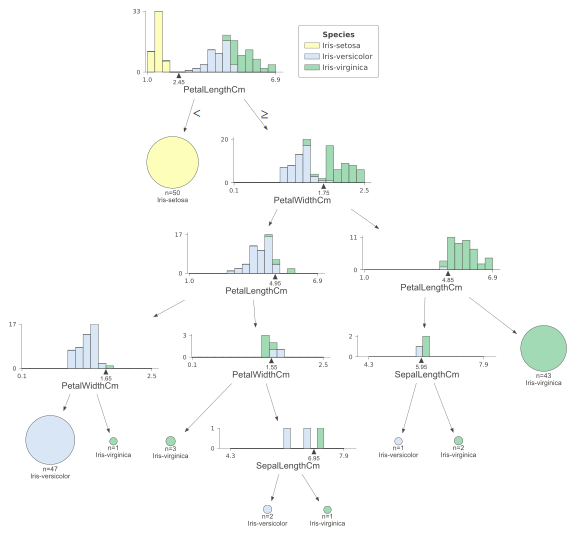

In [10]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dt_1, X, y,
                target_name="Species",
                feature_names=X.columns,
                class_names=list(le.classes_))

viz 

- We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.
- We can check by building a new model and dividing the data set into test and train datasets.

In [11]:
# Putting feature variable to X
X = df_copy.drop('Species',axis=1)

# Putting response variable to y
y = df_copy['Species']

In [12]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [13]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
25,5.0,3.0,1.6,0.2
13,4.3,3.0,1.1,0.1
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4


In [14]:
dt_2 = DecisionTreeClassifier()
dt_2.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import accuracy_score

# Making predictions
y_pred = dt_2.predict(X_test)

#### Accuracy and Classification

In [16]:
print(accuracy_score(y_test,y_pred))

0.9555555555555556


- We can see that we have a very good accuracy score.

In [17]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



- We can see that we have a very good precision score as well.